In [26]:
import pandas as pd 
import numpy as np
import re 

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [28]:
pae=pd.read_csv("output/patAEs2.csv")

In [29]:
pna=pd.read_csv("output/patNations2.csv")
pna.head()


,PatentNumber,nationality
0,JP2020007234-A,JP
1,WO2020014654-A1,WO
2,CN110669873-A,CN
3,WO2020006494-A1,WO
4,CN110616198-A,CN


In [30]:
import re 

pa=pd.read_csv("output/patents2.csv")
pa["main"]=list(map(lambda x: re.match("\w\d\d\w-\d\d\d",x).group(0),pa["ipcTOP3"]))
pa.head(5)

,Title,PatentNumber,ipcTOP3,authors,publishDate,language,pages,main
0,NaN,JP2020007234-A,A61K-038/07,FUTAKAWA K,2020.0,Japanese,4.0,A61K-038
1,NaN,WO2020014654-A1,A61K-039/12,PATTON J T,2020.0,English,4.0,A61K-039
2,NaN,CN110669873-A,C12Q-001/686,HUANG T,2020.0,Chinese,9.0,C12Q-001
3,NaN,WO2020006494-A1,C07K-014/005,BLOOM J,2020.0,English,7.0,C07K-014
4,NaN,CN110616198-A,A61K-039/215,ZHANG L,2019.0,Chinese,7.0,A61K-039


In [31]:
AEtable=pd.merge(pa,pae,left_on="PatentNumber",right_on="PatentNumber")
AEtable.head(5)

,Title,PatentNumber,ipcTOP3,authors,publishDate,language,pages,main,PatentAsignee
0,NaN,JP2020007234-A,A61K-038/07,FUTAKAWA K,2020.0,Japanese,4.0,A61K-038,UNIV TOKUSHIMA NAT CORP (UTKU-C)
1,NaN,JP2020007234-A,A61K-038/07,FUTAKAWA K,2020.0,Japanese,4.0,A61K-038,UNIV SAGAMI WOMENS (UYSA-Non-standard)
2,NaN,WO2020014654-A1,A61K-039/12,PATTON J T,2020.0,English,4.0,A61K-039,UNIV INDIANA (INDV-C)
3,NaN,WO2020014654-A1,A61K-039/12,PATTON J T,2020.0,English,4.0,A61K-039,PATTON J T (PATT-Individual)
4,NaN,CN110669873-A,C12Q-001/686,HUANG T,2020.0,Chinese,9.0,C12Q-001,UNIV GUIZHOU (UYGZ-C)


In [32]:
NAtable=pd.merge(pa,pna,left_on="PatentNumber",right_on="PatentNumber")
NAtable.head(5)

,Title,PatentNumber,ipcTOP3,authors,publishDate,language,pages,main,nationality
0,NaN,JP2020007234-A,A61K-038/07,FUTAKAWA K,2020.0,Japanese,4.0,A61K-038,JP
1,NaN,WO2020014654-A1,A61K-039/12,PATTON J T,2020.0,English,4.0,A61K-039,WO
2,NaN,CN110669873-A,C12Q-001/686,HUANG T,2020.0,Chinese,9.0,C12Q-001,CN
3,NaN,WO2020006494-A1,C07K-014/005,BLOOM J,2020.0,English,7.0,C07K-014,WO
4,NaN,CN110616198-A,A61K-039/215,ZHANG L,2019.0,Chinese,7.0,A61K-039,CN


In [33]:
NAtable.groupby(by=["nationality"]).count()
data=NAtable.groupby(by=["nationality"]).count()["PatentNumber"].sort_values(ascending=False).head(11)
data=data.drop(labels=["WO"])
data

nationality
US    3744
EP    2431
CN    2397
JP    2127
AU    1684
CA    1134
KR     989
IN     657
BR     602
DE     541
Name: PatentNumber, dtype: int64

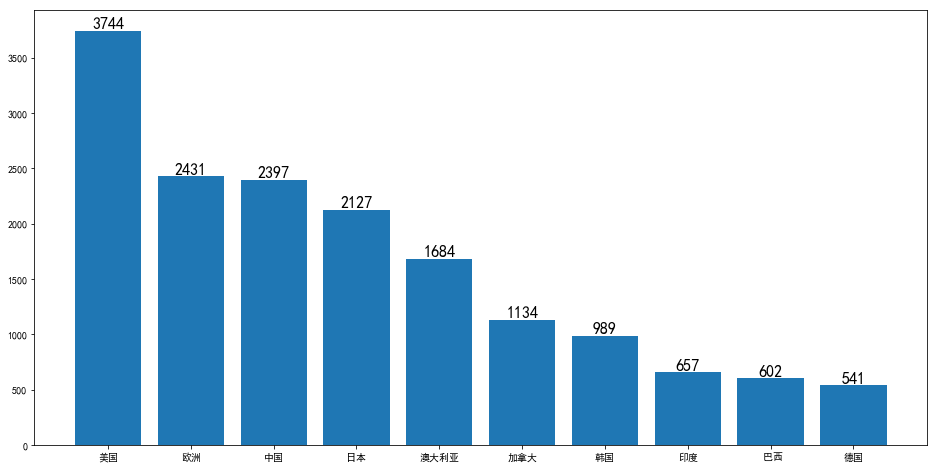

In [34]:
#各个地域的专利数据
plt.figure(figsize=(16,8))
plt.bar(x=range(len(data)),height=data.values,tick_label=["美国", "欧洲" ,"中国" ,"日本" ,"澳大利亚", "加拿大" ,"韩国" ,"印度"," 巴西","德国"])

for a,b in zip(range(len(data)),data.values):
    plt.text(a,b , '%.0f' % b, ha='center', va= 'bottom',fontsize=16)

In [35]:
pa.groupby(by=["publishDate"]).count()["PatentNumber"][-22:-1]

Series([], Name: PatentNumber, dtype: int64)

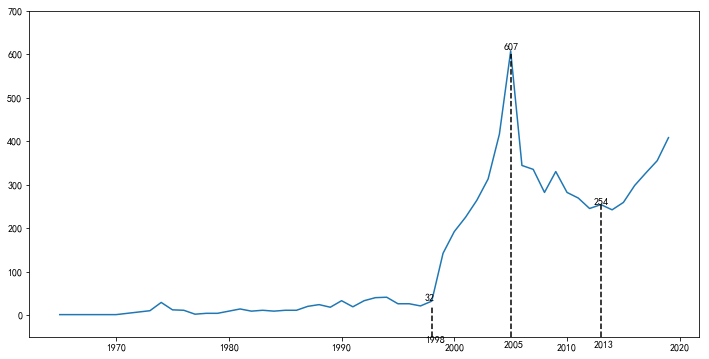

In [36]:
#各个地域的专利数据
data=pa.groupby(by=["publishDate"]).count()["PatentNumber"]
plt.figure(figsize=(12,6))
plt.plot(data.index[:-1],data.values[:-1])
plt.ylim(bottom=-50, top=700)



plt.axvline(x=1998 ,ymax=data[1998.0]/700+0.05,color="black",ls="--")
plt.axvline(x=2005 ,ymax=data[2005.0]/700,color="black",ls="--")
plt.axvline(x=2013 ,ymax=data[2013.0]/700+0.04,color="black",ls="--")
plt.annotate('254',
              xy=(2013-0.6 , data[2013.0]),
              xytext=(2013-0.6,data[2013.0]),
              weight='light',
              color='black',
            )
plt.annotate('2013',
              xy=(2013-0.6 , 20),
              xytext=(2013-0.6,-75),
              weight='light',
              color='black',
            )
plt.annotate('32',
              xy=(1998-0.6 , data[1998.0]),
              xytext=(1998-0.6,data[1998.0]),
              weight='light',
              color='black',
            )
plt.annotate('1998',
              xy=(1998-0.6 , 20),
              xytext=(1998-0.6,-65),
              weight='light',
              color='black',
            )
plt.annotate('607',
              xy=(2005-0.6 , 607),
              xytext=(2005-0.6,610),
              weight='light',
              color='black',
            )
plt.annotate('2005',
              xy=(2005-0.6 , 20),
              xytext=(2005-0.6,-75),
              weight='light',
              color='black',
            )
plt.show()
# for a,b in zip(range(len(data)),data.values):
#     plt.text(a,b  , '%.0f' % b, ha='center', va= 'bottom',fontsize=12)


In [37]:
data

publishDate
1965.0      1
1967.0      1
1968.0      1
1970.0      1
1973.0     10
1974.0     29
1975.0     12
1976.0     11
1977.0      2
1978.0      4
1979.0      4
1980.0      9
1981.0     14
1982.0      9
1983.0     11
1984.0      9
1985.0     11
1986.0     11
1987.0     20
1988.0     24
1989.0     18
1990.0     33
1991.0     19
1992.0     33
1993.0     40
1994.0     41
1995.0     26
1996.0     26
1997.0     21
1998.0     32
1999.0    142
2000.0    192
2001.0    225
2002.0    264
2003.0    313
2004.0    416
2005.0    607
2006.0    344
2007.0    335
2008.0    282
2009.0    330
2010.0    282
2011.0    269
2012.0    245
2013.0    254
2014.0    242
2015.0    259
2016.0    298
2017.0    327
2018.0    355
2019.0    408
2020.0     21
Name: PatentNumber, dtype: int64

In [38]:
alljion=pd.merge(pae,NAtable,left_on="PatentNumber",right_on="PatentNumber")
alljion.head()

,PatentNumber,PatentAsignee,Title,ipcTOP3,authors,publishDate,language,pages,main,nationality
0,JP2020007234-A,UNIV TOKUSHIMA NAT CORP (UTKU-C),NaN,A61K-038/07,FUTAKAWA K,2020.0,Japanese,4.0,A61K-038,JP
1,JP2020007234-A,UNIV SAGAMI WOMENS (UYSA-Non-standard),NaN,A61K-038/07,FUTAKAWA K,2020.0,Japanese,4.0,A61K-038,JP
2,WO2020014654-A1,UNIV INDIANA (INDV-C),NaN,A61K-039/12,PATTON J T,2020.0,English,4.0,A61K-039,WO
3,WO2020014654-A1,PATTON J T (PATT-Individual),NaN,A61K-039/12,PATTON J T,2020.0,English,4.0,A61K-039,WO
4,CN110669873-A,UNIV GUIZHOU (UYGZ-C),NaN,C12Q-001/686,HUANG T,2020.0,Chinese,9.0,C12Q-001,CN


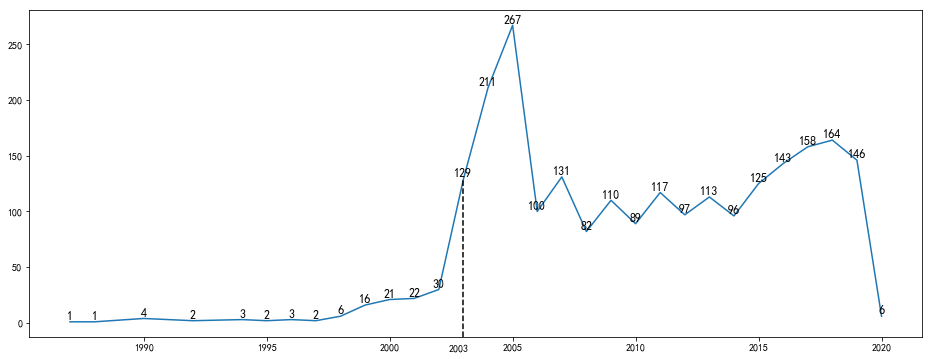

In [39]:
data=NAtable[NAtable["nationality"]=="CN"].groupby(by=["publishDate"]).count()["PatentNumber"]
plt.figure(figsize=(16,6))
plt.plot(data.index,data.values)
plt.axvline(x=2003 ,ymax=data[2003.0]/300+0.05,color="black",ls="--")
plt.annotate('2003',
              xy=(2003-0.6 , 20),
              xytext=(2003-0.6,-25),
              weight='light',
              color='black',
            )
for a,b in zip(data.index,data.values):
    plt.text(a,b , '%.d' % b, ha='center', va= 'bottom',fontsize=12)

In [40]:
data

publishDate
1987.0      1
1988.0      1
1990.0      4
1992.0      2
1994.0      3
1995.0      2
1996.0      3
1997.0      2
1998.0      6
1999.0     16
2000.0     21
2001.0     22
2002.0     30
2003.0    129
2004.0    211
2005.0    267
2006.0    100
2007.0    131
2008.0     82
2009.0    110
2010.0     89
2011.0    117
2012.0     97
2013.0    113
2014.0     96
2015.0    125
2016.0    143
2017.0    158
2018.0    164
2019.0    146
2020.0      6
Name: PatentNumber, dtype: int64

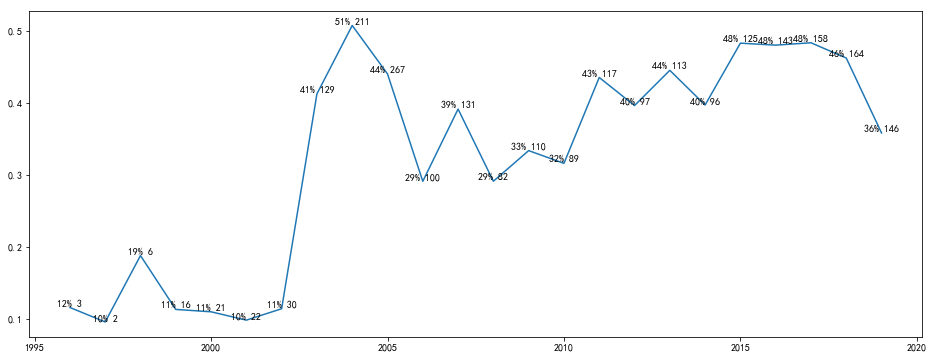

In [41]:

cdata=NAtable[NAtable["nationality"]=="CN"].groupby(by=["publishDate"]).count()["PatentNumber"].iloc[-25:-1]
data=cdata/pa.groupby(by=["publishDate"]).count()["PatentNumber"].iloc[-25:-1]
wdata=pa.groupby(by=["publishDate"]).count()["PatentNumber"].iloc[-25:-1]
plt.figure(figsize=(16,6))
plt.plot(data.index,data.values)
for a,b,c in zip(data.index,data.values,cdata):
    plt.text(a,b , '{:.0%} {}'.format(b,c), ha='center', va= 'bottom',fontsize=10)

In [42]:
IPCtop10=pa.groupby("main").count()["PatentNumber"].sort_values(ascending=False).head(10)
IPCtop10.sum()/pa.groupby("main").count()["PatentNumber"].sort_values(ascending=False).sum()
IPCtop10

main
A61K-031    880
C12Q-001    731
A61K-039    630
C12N-015    481
A61K-038    364
C07K-014    212
G01N-033    192
A61K-035    184
A61K-000    124
C07H-021    108
Name: PatentNumber, dtype: int64

In [43]:
means=[
"含有机有效成分的医药配制品",
"包含酶或微生物的测定或检验方法",
"含有抗原或抗体的医药配制品",
"遗传工程涉及的DNA或RNA分离、制备或纯化",
"含肽的医药配制品",
"具有多于20个氨基酸的肽",
"利用特殊方法来研究或分析材料",
"含有不明结构的原材料或反应产物的医用配制品 ",
"消毒或灭菌，或者绷带、敷料、吸收垫或外科用品",
"含有两个或多个单核苷酸单元的化合物"]

In [44]:
# data=IPCtop10
# plt.figure(figsize=(10,6))
# plt.barh(y=means,width=data.values)
# for a,b in zip(data.values,range(len(data.index))):
#       plt.text(a-30,b-0.1 , '{}   {}' .format(data.index[int(b)],a) , ha='center', va= 'bottom',fontsize=12)

In [45]:
pa.groupby(["main","publishDate"]).count()["PatentNumber"].loc[IPCtop10.index[0]]

publishDate
1984.0     1
1986.0     2
1988.0     1
1989.0     2
1990.0     5
1991.0     2
1992.0     6
1993.0     1
1994.0     4
1995.0     3
1996.0     1
1997.0     2
1998.0     1
1999.0     4
2000.0     8
2001.0     7
2002.0     6
2003.0    22
2004.0    30
2005.0    49
2006.0    44
2007.0    75
2008.0    42
2009.0    49
2010.0    55
2011.0    51
2012.0    44
2013.0    56
2014.0    38
2015.0    43
2016.0    48
2017.0    65
2018.0    51
2019.0    61
2020.0     1
Name: PatentNumber, dtype: int64

含有机有效成分的医药配制品A61K-031
包含酶或微生物的测定或检验方法C12Q-001
含有抗原或抗体的医药配制品A61K-039
遗传工程涉及的DNA或RNA分离、制备或纯化C12N-015
含肽的医药配制品A61K-038
具有多于20个氨基酸的肽C07K-014
利用特殊方法来研究或分析材料G01N-033
含有不明结构的原材料或反应产物的医用配制品 A61K-035
消毒或灭菌，或者绷带、敷料、吸收垫或外科用品A61K-000
含有两个或多个单核苷酸单元的化合物C07H-021


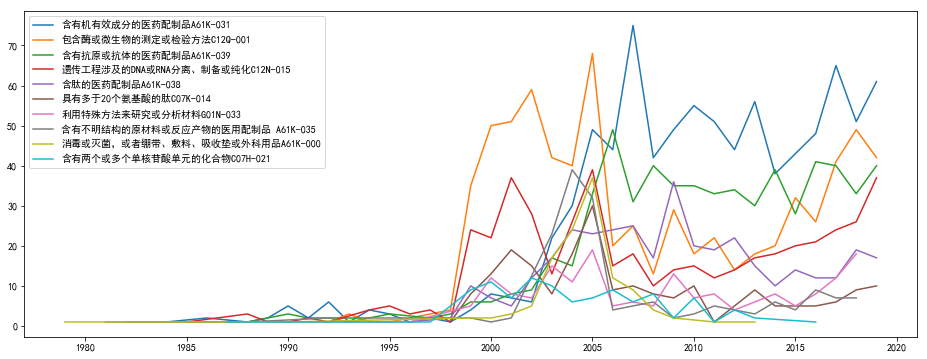

In [46]:
plt.figure(figsize=(16,6))
for n in range(10):

        data =pa.groupby(["main","publishDate"]).count()["PatentNumber"].loc[IPCtop10.index[n]]
        
        plt.plot(data.index[0:-1],data.values[0:-1])
        plt.legend(means+IPCtop10.index)
        print(means[n]+IPCtop10.index[n])


plt.savefig(means[n]+".png")

In [47]:
IPCtop10

main
A61K-031    880
C12Q-001    731
A61K-039    630
C12N-015    481
A61K-038    364
C07K-014    212
G01N-033    192
A61K-035    184
A61K-000    124
C07H-021    108
Name: PatentNumber, dtype: int64

In [48]:
raw=pa.groupby(["main","publishDate"]).count()["PatentNumber"]
raw.loc["A61K-031"]+raw.loc["A61K-039"]+raw.loc["A61K-035"]
pd.add?

Object `pd.add` not found.


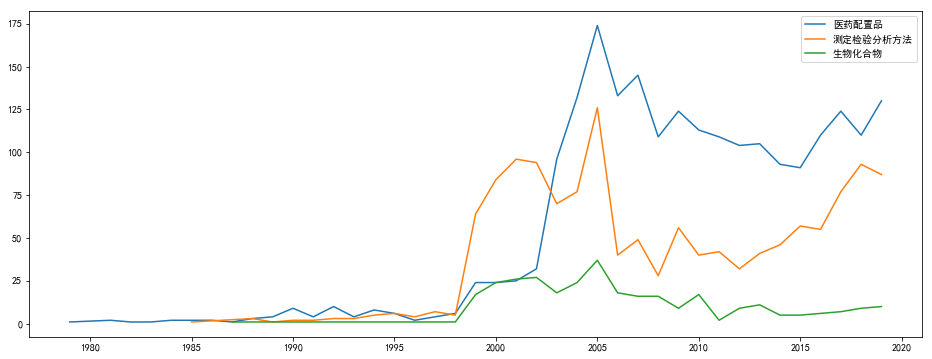

In [49]:
#用add来处理缺失值相加的问题
plt.figure(figsize=(16,6))
data1=raw.loc["A61K-031"].add(raw.loc["A61K-039"],fill_value=0).add(raw.loc["A61K-035"],fill_value=0).add(raw.loc["A61K-038"],fill_value=0).add(raw.loc["A61K-000"],fill_value=0).iloc[0:-1]
data2=raw.loc["C12Q-001"].add(raw.loc["C12N-015"],fill_value=0).add(raw.loc["G01N-033"],fill_value=0).iloc[0:-1]
data3=raw.loc["C07K-014"].add(raw.loc["C07H-021"],fill_value=0).iloc[0:-1]
plt.plot(data1.index,data1.values)
plt.plot(data2.index,data2.values)
plt.plot(data3.index,data3.values)
plt.legend(["医药配置品","测定检验分析方法","生物化合物"])

In [50]:
raw.loc["A61K-031"].add(raw.loc["A61K-039"],fill_value=0).add(raw.loc["A61K-035"],fill_value=0).iloc[0:-1]

publishDate
1981.0      1.0
1982.0      1.0
1983.0      1.0
1984.0      2.0
1985.0      2.0
1986.0      2.0
1987.0      1.0
1988.0      3.0
1989.0      4.0
1990.0      8.0
1991.0      4.0
1992.0     10.0
1993.0      4.0
1994.0      8.0
1995.0      6.0
1996.0      1.0
1997.0      4.0
1998.0      4.0
1999.0     12.0
2000.0     15.0
2001.0     17.0
2002.0     15.0
2003.0     62.0
2004.0     84.0
2005.0    114.0
2006.0     97.0
2007.0    111.0
2008.0     88.0
2009.0     86.0
2010.0     93.0
2011.0     89.0
2012.0     82.0
2013.0     89.0
2014.0     83.0
2015.0     75.0
2016.0     98.0
2017.0    112.0
2018.0     91.0
2019.0    113.0
Name: PatentNumber, dtype: float64

In [51]:
division=AEtable.groupby(by=["PatentAsignee","main"]).count()["PatentNumber"].loc[worldtop.index]
division=division/division.sum(level=0)
division

NameError: name 'worldtop' is not defined

In [ ]:
for i in range(len(worldtop.index)):
    print(i)
    an=division[worldtop.index[i]]
   
    indice=[]
    [an.values<0.1]
    for a,b in zip(an.index,an.values):
        if b>0.1 :
            indice.append(str(a)+"  "+ "{:.1%}".format(b))
        else :
            indice.append( "{:.1%}".format(b))
    plt.figure(figsize=(6, 6))
    plt.pie(x=an.values,labels=indice)
    plt.title(worldtop.index[i])
    
    plt.savefig(worldtop.index[i]+'.png')


In [ ]:
AEtable.groupby(PatentAsignee,"main"]).count()["PatentNumber"].loc[CNtop.index].count()

In [52]:
# list(map(lambda x:re.sub(r"\(.+?\)","",x),data.index))

In [53]:
CNtop=alljion[alljion["nationality"]=="CN"].groupby(by="PatentAsignee").count()["PatentNumber"].sort_values(ascending=False).head(20)#只有一列数据是不用指定排列的目标
worldtop=AEtable.groupby(by="PatentAsignee").count()["PatentNumber"].sort_values(ascending=False).head(10 )#只有一列数据是不用指定排列的目标
worldtop                                                                                               

PatentAsignee
US DEPT HEALTH & HUMAN SERVICES (USSH-C)    62
UNIV CALIFORNIA (REGC-C)                    53
NOVARTIS AG (NOVS-C)                        46
HARVARD COLLEGE (HARD-C)                    38
BRIDGESTONE CORP (BRID-C)                   38
UNIV NORTH CAROLINA (UNCR-C)                37
ASTRAZENECA AB (ASTR-C)                     32
UNIV TSINGHUA (UYQI-C)                      29
UNIV TEXAS SYSTEM (TEXA-C)                  29
CENT NAT RECH SCI (CNRS-C)                  29
Name: PatentNumber, dtype: int64

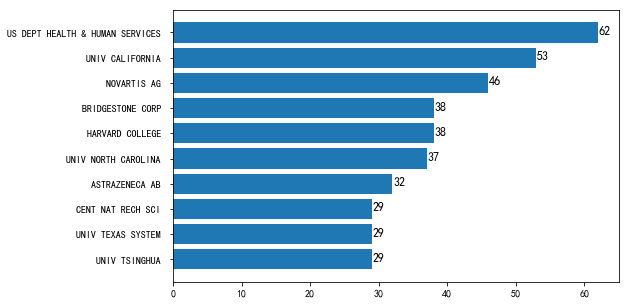

In [54]:

data=worldtop.sort_values(ascending=True)
plt.figure(figsize=(8,5))
for a,b in zip(range(len(data.index)),data.values):
 plt.text(b+1,a-0.15 , '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
plt.barh(list(map(lambda x:re.sub(r"\(.+?\)","",x),data.index)),data.values)
plt.savefig("世界专利权人"+'.png')

In [55]:
# alljion[alljion["nationality"]=="CN"].groupby(by="PatentAsignee").count()["PatentNumber"].sort_values(ascending=False).sum()

In [59]:
CNtop

PatentAsignee
UNIV TSINGHUA (UYQI-C)                                          28
NOVARTIS AG (NOVS-C)                                            23
GE HEALTHCARE LTD (GENE-C)                                      22
ASTRAZENECA AB (ASTR-C)                                         20
SHANGHAI INST MATERIA MEDICA CAS (CAMM-C)                       17
UNIV FUDAN (UYFU-C)                                             16
BRIDGESTONE CORP (BRID-C)                                       16
JOHNSON MATTHEY PLC (JOHO-C)                                    16
UNIV NANKAI (UNAN-C)                                            16
GAO P (GAOP-Individual)                                         15
JOHNSON MATTHEY INC (JOHO-C)                                    13
TIANJIN INT BIOPHARMACEUTICAL UNITED RES (TIAN-Non-standard)    13
WYETH CORP (AMHP-C)                                             12
WYETH (AMHP-C)                                                  12
UNIV WUHAN (UYWU-C)                             

In [57]:

list(map(lambda x:not bool(re.search(r".+Individual",x)),raw.index))

TypeError: expected string or bytes-like object

In [62]:
# 对某一个机构进行合作分析
PatentAsignee="NOVARTIS AG (NOVS-C)"
qinghuapn=AEtable[AEtable["PatentAsignee"]==PatentAsignee]["PatentNumber"]
raw=AEtable[AEtable["PatentNumber"].isin(qinghuapn)]
raw=raw.groupby(by=["PatentAsignee"]).count()[["PatentNumber"]]
raw=raw[list(map(lambda x:not bool(re.search(r".+Individual",x)),raw.index))]#去掉含有个体的项
raw[raw.values>2]

,PatentNumber
PatentAsignee,
ARROWHEAD PHARM INC (ARRO-Non-standard),6
ARROWHEAD RES CORP (ARRO-Non-standard),6
GLAXOSMITHKLINE BIOLOGICALS SA (GLAX-C),4
NOVARTIS AG (NOVS-C),46
NOVARTIS PHARMA GMBH (NOVS-C),6
NOVARTIS VACCINES&DIAGNOSTICS INC (NOVS-C),4
NOVARTIS-ERFINDUNGEN VERW GES MBH (NOVS-C),4
TRIAD THERAPEUTICS INC (TRIA-Non-standard),3
